# Import

In [1]:
%matplotlib inline
import glob
import re
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# Load parameters

In [25]:
model_path = 'results/results-crossvalidation-01/model'
param_files = sorted(glob.glob(model_path + '/*/'))
params = []
for file_name in param_files:
    epoch_file_name = file_name + "epochs.csv"
    param_file_name = file_name + "params.txt"
    file = open(param_file_name, 'r')
    param = file.read()
    param = re.sub('=', ': ', param)
    param = re.sub('Iteration.*opti', '', param)
    param = re.sub(',.*?: ', '|', param)
    param = re.sub('mizer: ', '', param)
    param = param.split("|")
    param.append(file_name.replace(model_path + '\\', ''))
    param.append(pd.read_csv(epoch_file_name))
    params.append(param)
    file.close()
print(params[0][0:7])

['Adam', '0.0001', '0.0001', '4', '8', '16', '0']


# Display some data

In [26]:
params[0][8].head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.564182,0.692168,0.528926,0.692712
1,1,0.559006,0.691251,0.528926,0.691911
2,2,0.570393,0.692210,0.561983,0.691229
3,3,0.555901,0.691738,0.566116,0.690465
4,4,0.565217,0.690249,0.566116,0.689682


# Plot epochs for each item in params

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,layer_4,name
0,1,Adam,0.0001,0.0001,4,8,16,0,2018-03-03-21-03-04\


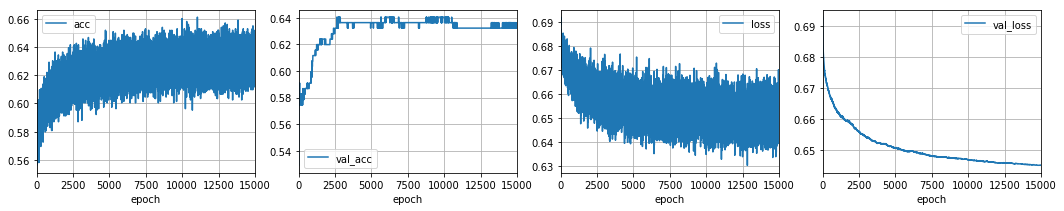

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,layer_4,name
0,2,Adam,0.0001,0.0001,4,8,16,0,2018-03-03-22-00-53\


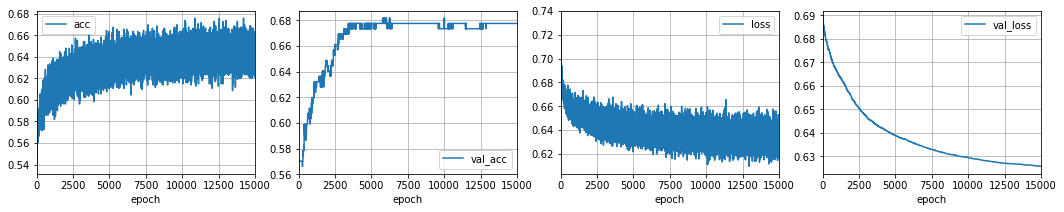

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,layer_4,name
0,3,Adam,0.0001,0.0001,4,8,16,0,2018-03-03-23-01-03\


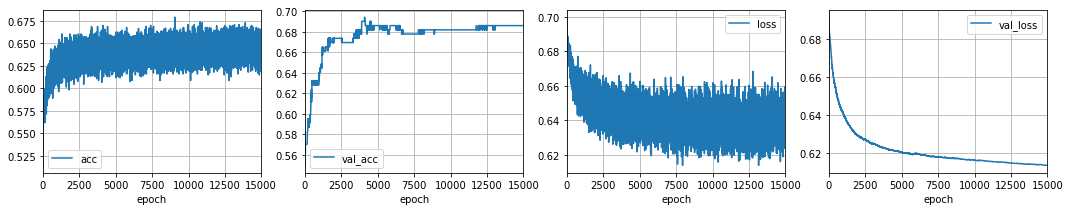

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,layer_4,name
0,4,Adam,0.0001,0.0001,4,8,16,0,2018-03-03-23-57-59\


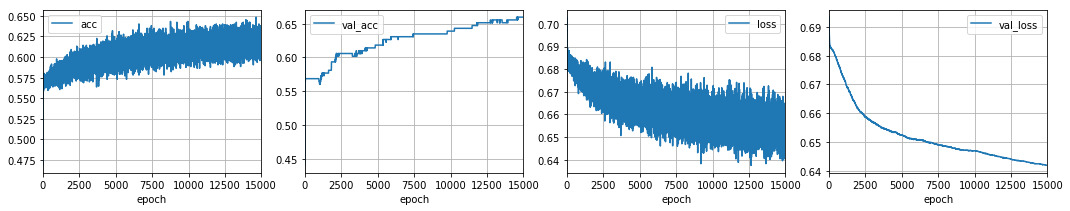

***

,serial,optimizer,learning_rate,decay,layer_1,layer_2,layer_3,layer_4,name
0,5,Adam,0.0001,0.0001,4,8,16,0,2018-03-04-00-56-14\


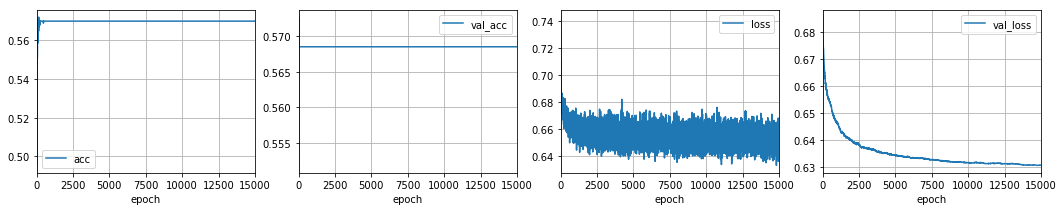

In [27]:
i = 1
for param in params:
    
    # Display a horizontal line.
    display(Markdown('***'))
    
    # Prepare a dataframe and render it in a nicely formatted table.
    param_array = {
        'serial': [str(i)],
        'optimizer': [param[0]],
        'learning_rate': [param[1]],
        'decay': [param[2]],
        'layer_1': [param[3]],
        'layer_2': [param[4]],
        'layer_3': [param[5]],
        'layer_4': [param[6]],
        'name': [param[7]]
    }
    df = pd.DataFrame(param_array, columns=[
        'serial',
        'optimizer', 
        'learning_rate', 
        'decay',
        'layer_1', 
        'layer_2', 
        'layer_3', 
        'layer_4', 
        'name'])
    display(df.head())

    # Plot all the epochs.
    plt.figure(1, figsize=(18,3))
    plt.subplot(1,4,1)
    param[8].plot(x='epoch', y='acc', ax=plt.gca())
    plt.grid(True)
    plt.subplot(1,4,2)
    param[8].plot(x='epoch', y='val_acc', ax=plt.gca())
    plt.grid(True)
    plt.subplot(1,4,3)
    param[8].plot(x='epoch', y='loss', ax=plt.gca())
    plt.grid(True)
    plt.subplot(1,4,4)
    param[8].plot(x='epoch', y='val_loss', ax=plt.gca())
    plt.grid(True)
    plt.show()
    i = i+1